# https://developer.ibm.com/tutorials/getting-started-with-pyspark/

In [2]:
import pyspark

In [3]:
sc = pyspark.SparkContext()

In [4]:
sc.version

'3.0.1'

In [5]:
sc.pythonVer

'3.6'

In [6]:
my_list = [1,2,3,4,5]

In [7]:
numRDD = sc.parallelize(my_list)

In [8]:
cubeRDD = numRDD.map(lambda x: x**3)

In [9]:
numbers_all = cubeRDD.collect()

In [10]:
[print(num) for num in numbers_all]

1
8
27
64
125


[None, None, None, None, None]

In [11]:
pairRdd = sc.parallelize([(1,2), (3,4), (3,6), (4,5)])

In [12]:
pairRdd_Reduced = pairRdd.reduceByKey(lambda x, y: x+y)

In [13]:
[print(num) for num in pairRdd_Reduced.collect()]

(1, 2)
(3, 10)
(4, 5)


[None, None, None]

In [14]:
total = pairRdd.countByKey()

In [15]:
total.items()

dict_items([(1, 1), (3, 2), (4, 1)])

In [18]:
spark = pyspark.SQLContext(sc)

In [20]:
sample_list = [("Mona", 23), ("Lisa", 29), ("Leonardo", 37)]

In [21]:
rdd = sc.parallelize(sample_list)

In [22]:
df_names = spark.createDataFrame(rdd, schema=['Name', 'Age'])

In [23]:
type(df_names)

pyspark.sql.dataframe.DataFrame

In [24]:
df_names.show()

+--------+---+
|    Name|Age|
+--------+---+
|    Mona| 23|
|    Lisa| 29|
|Leonardo| 37|
+--------+---+



In [25]:
from pyspark.sql import SparkSession

In [26]:
spark = SparkSession.builder.getOrCreate()

In [29]:
df_people = spark.read.csv('./people.csv', header=True, inferSchema=True)

In [32]:
df_people.show()

+---+---------+-----------------+------+-------------+
|_c0|person_id|             name|   sex|date of birth|
+---+---------+-----------------+------+-------------+
|  0|      100|   Penelope Lewis|female|   1990-08-31|
|  1|      101|    David Anthony|  male|   1971-10-14|
|  2|      102|        Ida Shipp|female|   1962-05-24|
|  3|      103|     Joanna Moore|female|   2017-03-10|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|
|  5|      105|    David Simmons|  male|   1999-12-30|
|  6|      106|    Edward Hudson|  male|   1983-05-09|
|  7|      107|     Albert Jones|  male|   1990-09-13|
|  8|      108| Leonard Cavender|  male|   1958-08-08|
|  9|      109|   Everett Vadala|  male|   2005-05-24|
| 10|      110| Freddie Claridge|  male|   2002-05-07|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|
| 12|      112|    Eulah Emanuel|female|   1976-01-19|
| 13|      113|       Shaun Love|  male|   1970-05-26|
| 14|      114|Alejandro Brennan|  male|   1980-12-22|
| 15|     

In [33]:
df_people.count()

100000

In [35]:
df_people.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- person_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- date of birth: string (nullable = true)



In [36]:
df_people_sub = df_people.select('name', 'sex', 'date of birth')

In [37]:
df_people_sub.show(10)

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows



In [38]:
df_people_sub_nodup = df_people_sub.dropDuplicates()

In [39]:
print("Before removing duplicates", df_people.count())
print("After removing duplicates", df_people_sub_nodup.count())

Before removing duplicates 100000
After removing duplicates 99998


In [40]:
clusterRDD = sc.textFile('./5000_points.txt')

In [41]:
clusterRDD.getNumPartitions()

2

In [42]:
clusterRDD.take(5)

['664159\t550946',
 '665845\t557965',
 '597173\t575538',
 '618600\t551446',
 '635690\t608046']

In [43]:
rdd_split = clusterRDD.map(lambda x: x.split('\t'))

In [44]:
rdd_split.take(5)

[['664159', '550946'],
 ['665845', '557965'],
 ['597173', '575538'],
 ['618600', '551446'],
 ['635690', '608046']]

In [45]:
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

In [46]:
rdd_split_int.take(5)

[[664159, 550946],
 [665845, 557965],
 [597173, 575538],
 [618600, 551446],
 [635690, 608046]]

In [62]:
from pyspark.mllib.clustering import KMeans
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [53]:
temp = 0
cluster = 0
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    SSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x+y)
    while temp > SSE or temp == 0:
        temp = SSE
        cluster = clst
    print("The cluster", clst, "has Sum of Squared Error", SSE)
print("\ncluster", cluster)
print("SSE:", temp)

The cluster 13 has Sum of Squared Error 252060331.1260039
The cluster 14 has Sum of Squared Error 215808893.2796594
The cluster 15 has Sum of Squared Error 169394691.52639425
The cluster 16 has Sum of Squared Error 168103213.0429197

cluster 16
SSE: 168103213.0429197


In [54]:
model = KMeans.train(rdd_split_int, k=cluster, seed=1)

In [55]:
cluster_centers = model.clusterCenters

In [56]:
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

In [57]:
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

In [60]:
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

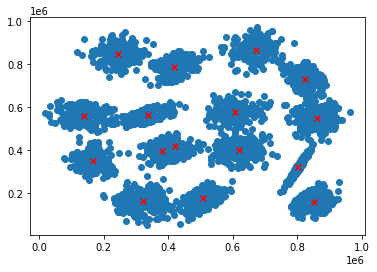

In [63]:
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()